# Problem Statement and Business Goal

### Problem Statement
- Boombikes is a bike sharing company in the US that offers shared bikes to people on rent/free
- BoomBikes aspires to understand the demand for shared bikes among the people and identify what factors it depends upon
- A consulting company has gathered a large dataset on daily bike demands across the American market based on some factors
- The company wants to know:
    -- Which variables are significant in predicting the demand for shared bikes.
    -- How well those variables describe the bike demands

### Business Goal
- Build a model to predict the demand for shared bikes with the available independent variables
- The model will be a good way for management to formulate/adapt business strategy to meet the demand levels and meet the customer's expectations and understand the demand dynamics of a new market

# Multiple Linear Regression for Boombikes

## Steps for Multiple Linear Regression
- Read and understand the data
    -- Read the data and its key features
    -- Visualize the data including correlation between variables
- Prepare data for modelling 
    -- Split the data into train and test data
    -- Scaling of features
- Training the model
    -- Auto feature elimination using RFE for coarse selection
    -- Manual feature elimination by checking metrics such as p value, VFI
- Residuals analysis on the train data
- Predict the target variable on the test data
- Model assessment to validate its efficacy

## Step 1 : Read and Understand the data

In [245]:
# import all required libraries/packages/classes/modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [246]:
# Read the data in a dataframe
bikeshare = pd.read_csv("day.csv")

In [247]:
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [248]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


As seen above there are no null values in any of the fields

In [249]:
bikeshare.shape

(730, 16)

In [250]:
bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- Though the describe function considers the above fields as numeric, from the data dictionary we know that some of the fields are actually categorical
- The variables casual and registered are just a representation of the target variable cnt, as the sum of these gives the target variable as a result - therefore these are not actually features of the data, so we will drop them
- For ease of understanding the data lets create three list of columns as below
    - binary columns - with value 1 or 0
    - categorical columns
    - numberic columns

In [251]:
bikeshare = bikeshare.drop(['casual','registered'], axis = 1)

In [252]:
binary_cols = ['yr','holiday','workingday'] 
# though the yr here signifies whether it is 2018 or 2019, we can consider it as binary as there are only two values
num_cols = ['temp','atemp','hum','windspeed','cnt']
# instant is also numeric - but not included here as it is just a sequence
cat_cols = ['season','mnth','weekday','weathersit']
# dteday is a date field an not included in any of the above categories

In [253]:
bikeshare[num_cols].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [254]:
bikeshare[num_cols].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


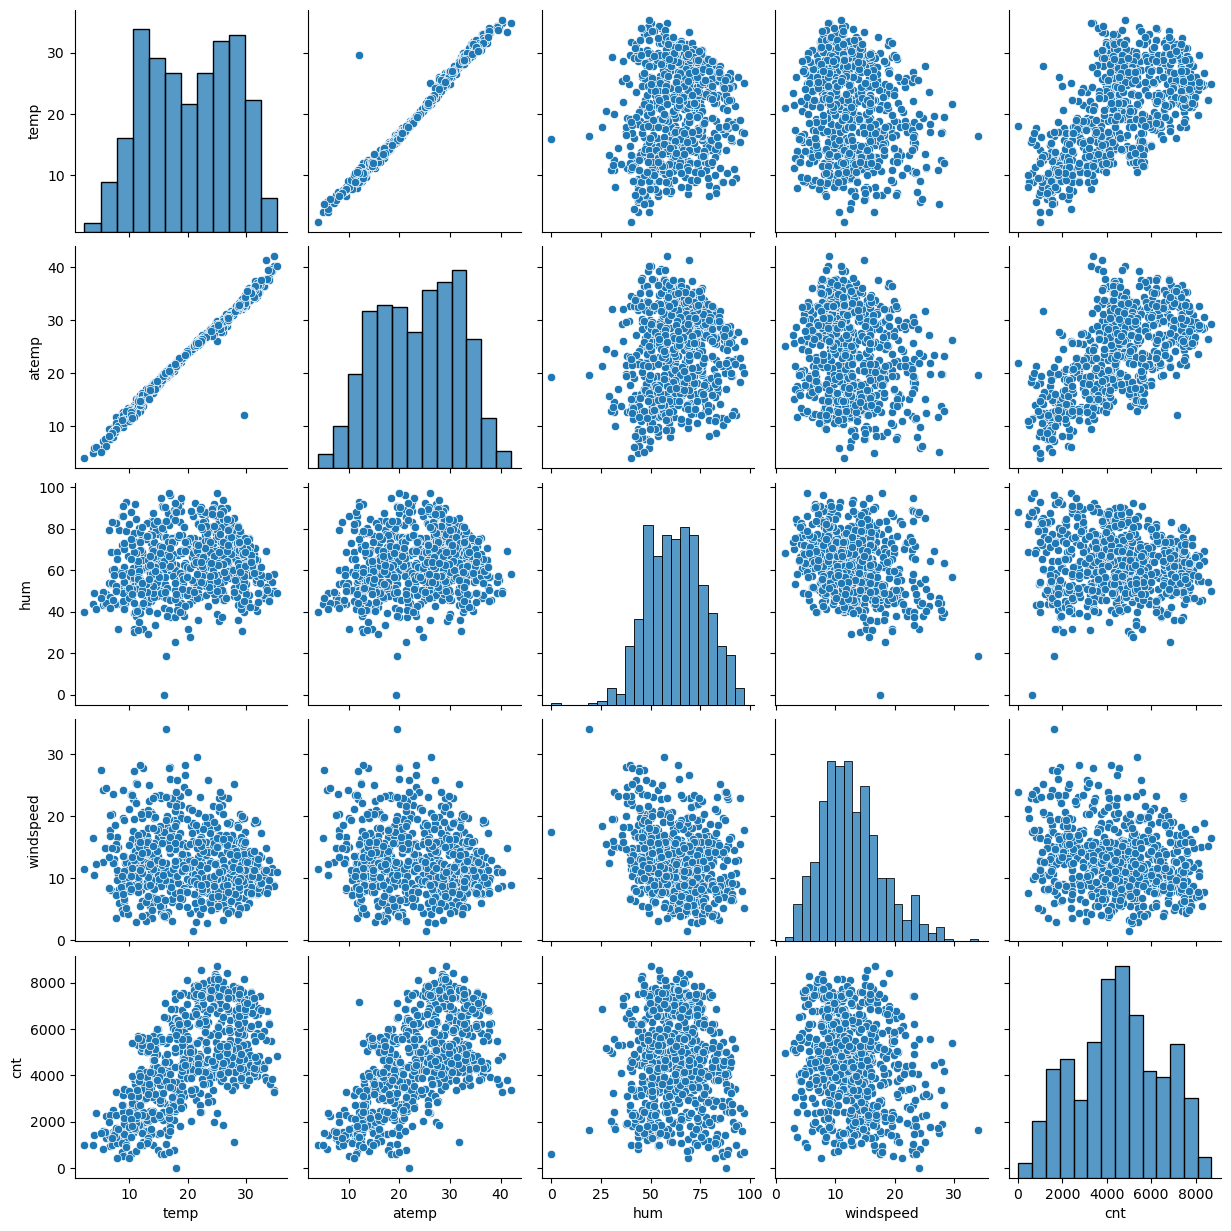

In [255]:
# Lets visualize the data using a pair plot
sns.pairplot(bikeshare[num_cols])
plt.show()

#### Few insights from above are:

- cnt has a strong positive correlation with temp and atemp
- cnt has a weak negative correlation with windspeed - that means count of bikes taken on rent decreases with increase in wind speed
- temp and atemp have a very high correlation between them with the coefficient as 0.991696

In [257]:
#Lets convert values in the categorical variable season to represent the meanings
season_dict = {1:'spring',2:'summer',3:'fall',4:'winter'}
bikeshare.season = bikeshare.season.apply(lambda x : season_dict[x])

In [258]:
bikeshare.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [259]:
#Lets convert values in the categorical variable weathersit to represent the meanings
weather_dict = {1:'clear',2:'misty',3:'cloudy',4:'stormy'}
bikeshare.weathersit = bikeshare.weathersit.apply(lambda x : weather_dict[x])

In [260]:
bikeshare.weathersit.value_counts()

weathersit
clear     463
misty     246
cloudy     21
Name: count, dtype: int64

In [264]:
#Lets convert values in the categorical variable mnth to represent the meanings
month_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bikeshare.mnth = bikeshare.mnth.apply(lambda x : month_dict[x])

In [265]:
#Lets convert values in the categorical variable weekday to represent the meanings
weekday_dict = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
bikeshare.weekday = bikeshare.weekday.apply(lambda x : weekday_dict[x])

In [266]:
# Lets create a joint list of categorical and binary columns
cat_bin_cols = cat_cols + binary_cols

<Figure size 640x480 with 0 Axes>

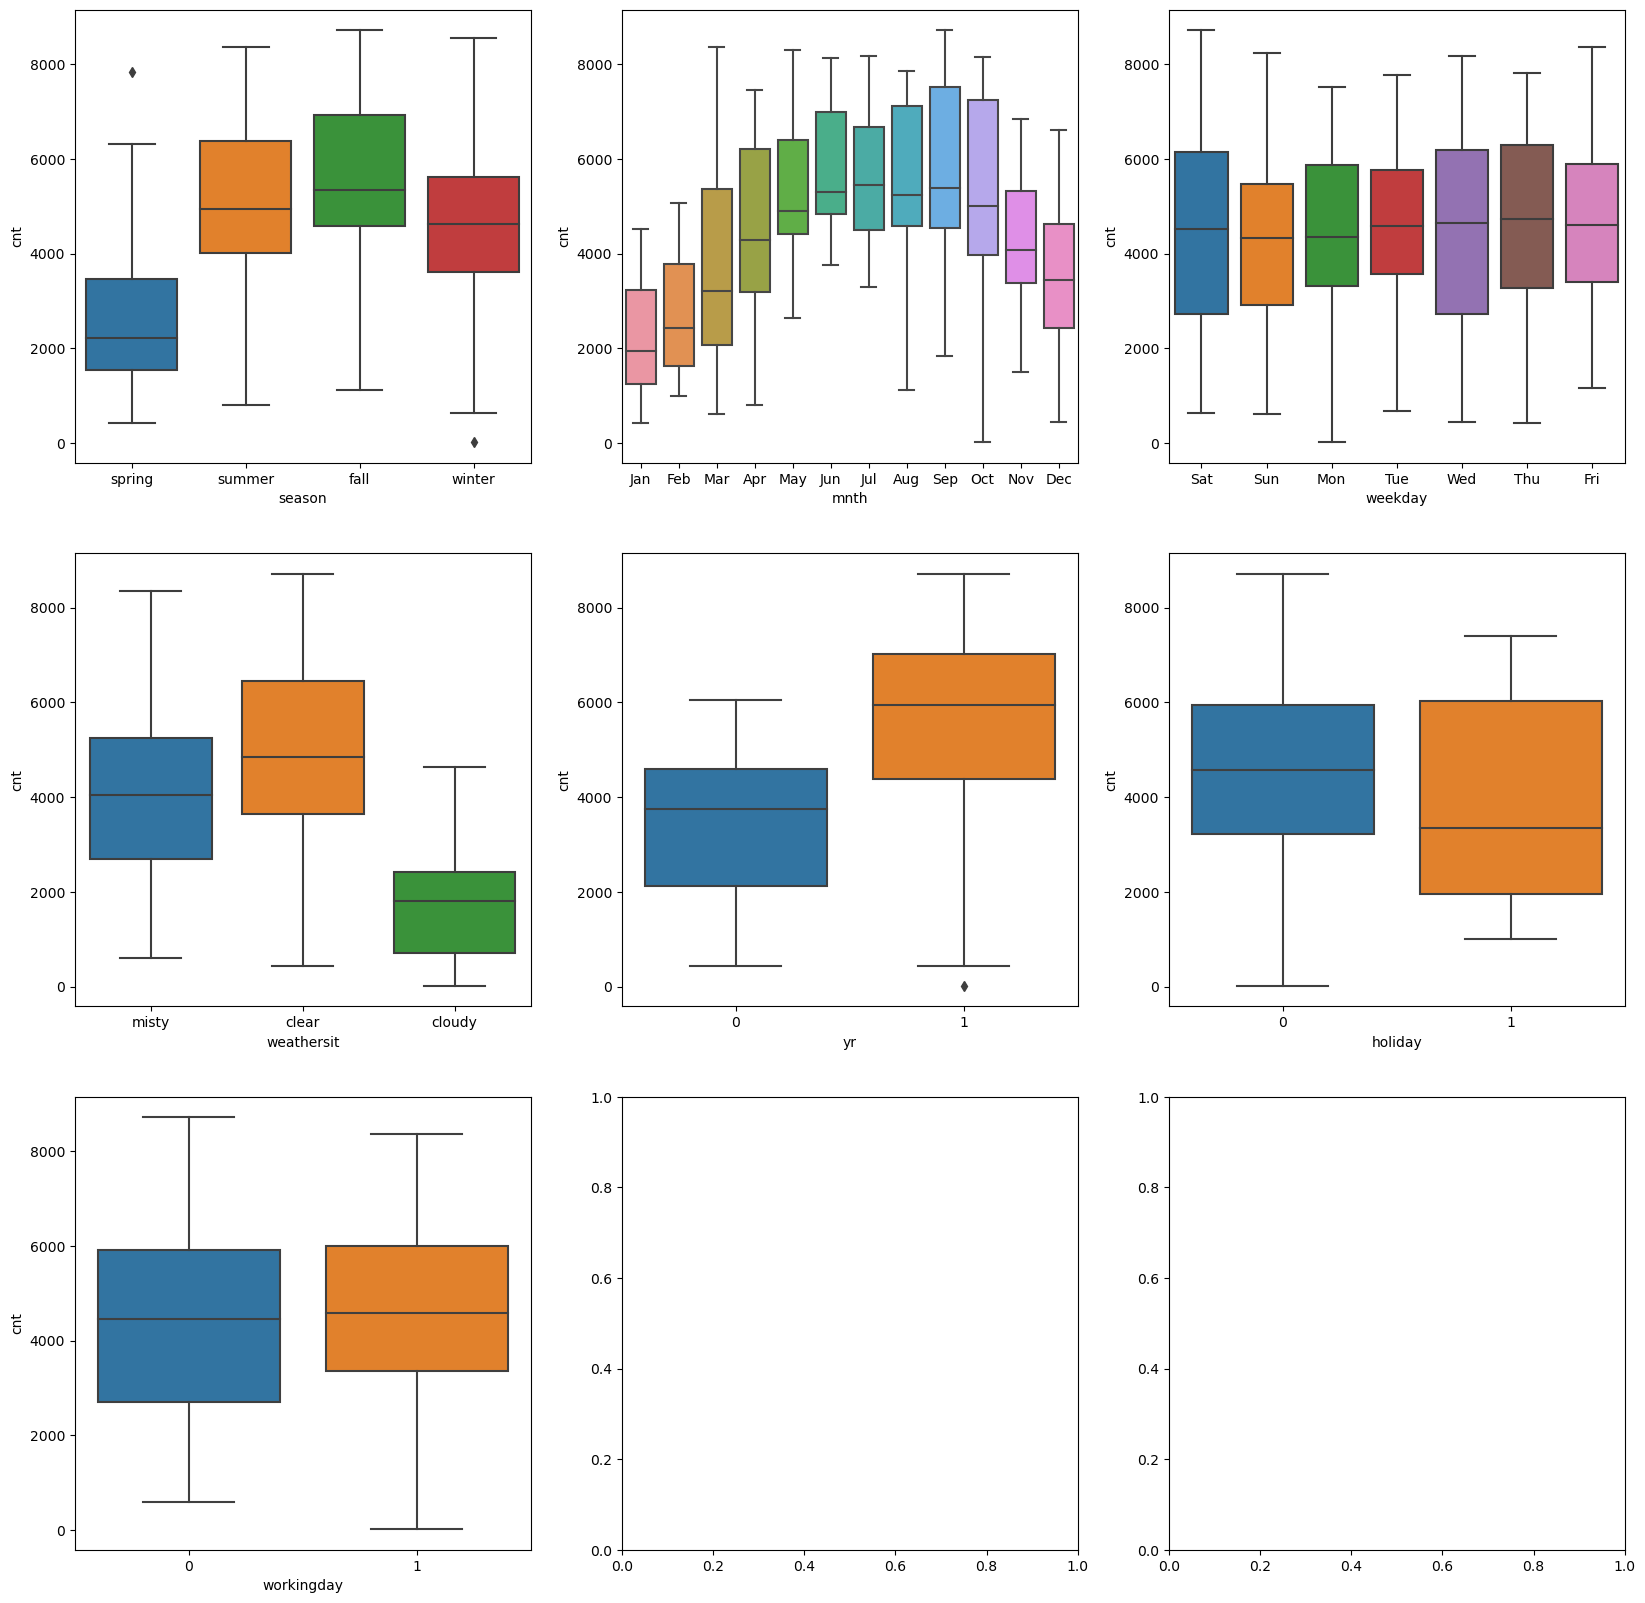

In [267]:
# For the categorical & binary columns lets plot the box plots vs cnt
plt.figure()
fig1, ax = plt.subplots(3,3)
fig1.set_size_inches(20,20)
i=0
for var in cat_bin_cols:
    r=int(i/3)
    c=int(i%3)
    sns.boxplot(ax=ax[r][c],x=var,y='cnt',data=bikeshare)
    i=i+1
plt.show()

#### Observations from above plots
- No data points in the data set for weathersit stormy
- For weathersit cloudy, the median of cnt is quite lower than weathersit misty which is lower than median for weathersit clear. This seems to be inline with the stated info in the data dictionary the harshness of weather decreases from level cloudy (3) to misty (2) to clear (1)
- The median of cnt is nearly the same across the days of the week
- The seasons Summer and Fall have a higher median as compared to Spring and Winter with Spring having the least median.
- Year 2019 has a significantly higher median cnt as compared to 2018 - this shows an increasing trend in business.
- Median cnt for Holidays is lower than not a holiday.

In [268]:
# The columns instant and dteday do not serve any purpose in the linear regression analysis, 
# therefore lets drop these columns as well
bikeshare = bikeshare.drop(['instant','dteday'],axis=1) 

## Step 2 : Prepare the data for modelling
- Encoding
    - Convert binary categorical variables to 1/0
    - Convert other catergorical variables to dummy vars
- Splitting into train and test
- Rescaling of variables

In [269]:
# Lets check the binary and categorical variables we have 
print(binary_cols)

['yr', 'holiday', 'workingday']


In [270]:
bikeshare[binary_cols].describe()

,yr,holiday,workingday
count,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562
std,0.500343,0.167266,0.465405
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000
75%,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


As we see, these variables already have values between 0 and 1 and no other treatment is needed as of now

In [271]:
print(cat_cols)

['season', 'mnth', 'weekday', 'weathersit']


### Encoding of categorical variables
- We will use the get_dummies function to get dummy variables for the categorical variables

In [272]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [273]:
#Get dummy values for the values in season variable
season_df = pd.get_dummies(bikeshare.season, dtype=int,drop_first=True)
bikeshare = pd.concat([bikeshare,season_df],axis=1)

In [274]:
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Sat,0,misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Sun,0,misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [275]:
# Lets consider the weathersit variable
weather_df = pd.get_dummies(bikeshare.weathersit, dtype=int,drop_first=True)
bikeshare = pd.concat([bikeshare,weather_df],axis=1)

In [276]:
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,cloudy,misty
0,spring,0,Jan,0,Sat,0,misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,spring,0,Jan,0,Sun,0,misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [277]:
# mnth variable
month_df = pd.get_dummies(bikeshare.mnth, dtype=int, drop_first=True)
bikeshare = pd.concat([bikeshare,month_df],axis=1)

In [278]:
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Sat,0,misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,misty,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [279]:
# weekday
weekday_df = pd.get_dummies(bikeshare.weekday, dtype=int, drop_first=True)
bikeshare = pd.concat([bikeshare,weekday_df],axis=1)

In [280]:
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Sat,0,misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sun,0,misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [281]:
cat_cols

['season', 'mnth', 'weekday', 'weathersit']

In [282]:
# Now that we have encoded the four categorical columns, we may now drop the original columns
bikeshare_df = bikeshare.drop(cat_cols,axis=1)

In [283]:
bikeshare_df.shape

(730, 30)

In [284]:
bikeshare_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


### Split the dataset into train and test

In [285]:
df_train, df_test = train_test_split(bikeshare_df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [286]:
num_cols

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

### Rescaling of the numerical variables

In [287]:
# we will use the min max scaling
#instantiate an object
scaler = MinMaxScaler()

#fit the scaler on the data
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


In [288]:
df_train[num_cols].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3: Training the model

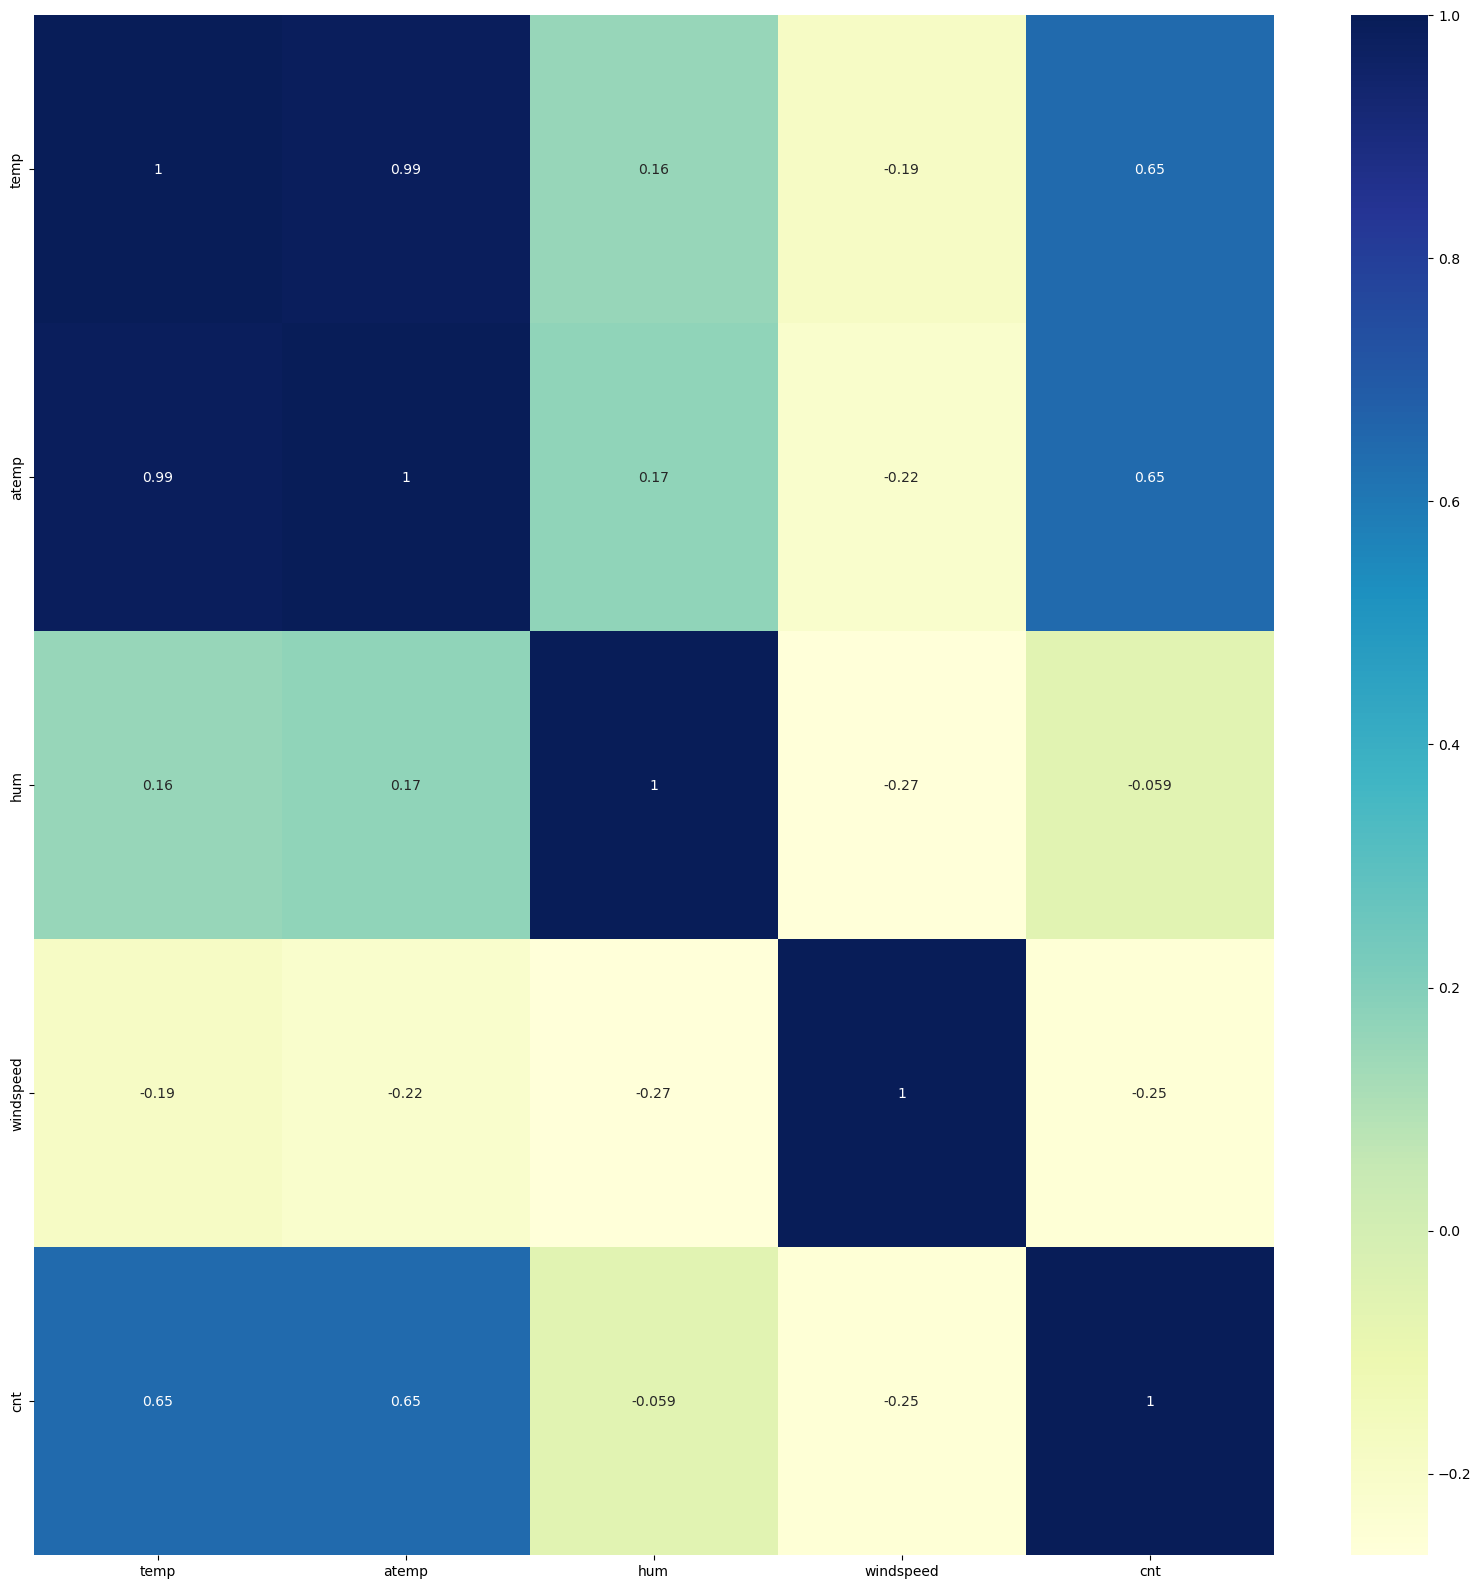

In [289]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train[num_cols].corr(), cmap='YlGnBu', annot=True)
plt.show()

### Lets build the model first using all the variables and check the summary

In [290]:
# Define X_train and y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [291]:
X_train_lm = sm.add_constant(X_train)

In [292]:
lm = sm.OLS(y_train, X_train_lm).fit()  #Running the linear model

In [293]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          2.81e-180
Time:                        22:42:48   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2433      0.035      6.887      0.000       0.174       0.313
yr             0.2325      0.008     28.794      0.000       0.217       0.248
holiday        0.0109      0.024      0.451      0.652      -0.037       0.058
workingday     0.0963      0.012      7.835      0.000       0.072       0.120
temp           0.3880      0.142      2.727      0.007       0.108       0.668
atemp          0.0590      0.138      0.426      0.670      -0.213       0.331
hum           -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
spring        -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer         0.0424      0.026      1.617      0.107      -0.009       0.094
winter         0.1071      0.028      3.826      0.000       0.052       0.162
cloudy        -0.2550      0.026     -9.631      0.000      -0.307      -0.203
misty         -0.0595      0.010     -5.701      0.000      -0.080      -0.039
Aug            0.0223      0.034      0.657      0.511      -0.044       0.089
Dec           -0.0443      0.034     -1.316      0.189      -0.110       0.022
Feb           -0.0323      0.033     -0.980      0.327      -0.097       0.032
Jan           -0.0631      0.034     -1.876      0.061      -0.129       0.003
Jul           -0.0327      0.035     -0.931      0.352      -0.102       0.036
Jun            0.0060      0.025      0.241      0.810      -0.043       0.055
Mar            0.0016      0.025      0.063      0.950      -0.047       0.050
May            0.0255      0.021      1.208      0.228      -0.016       0.067
Nov           -0.0398      0.036     -1.093      0.275      -0.111       0.032
Oct            0.0077      0.036      0.215      0.830      -0.063       0.078
Sep            0.0868      0.032      2.711      0.007       0.024       0.150
Mon           -0.0216      0.015     -1.401      0.162      -0.052       0.009
Sat            0.0952      0.014      6.910      0.000       0.068       0.122
Sun            0.0410      0.014      2.929      0.004       0.013       0.068
Thu           -0.0097      0.016     -0.623      0.534      -0.040       0.021
Tue           -0.0184      0.016     -1.184      0.237      -0.049       0.012
Wed           -0.0059      0.015     -0.394      0.694      -0.035       0.023
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     7.47e+15
==============================================================================

N

#### Some observations from the above summary are as follows:
- The R-squared is 0.853 which means 85.3% of the variance is explained
- Though the above R-squared is good, some independent variables have a very high P value - that means the coefficients for these may not be statistically significant

### Coarse feature selection using RFE
- Here we will use recursive feature elimination to automate the selection of top 15 features

In [294]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)  # running RFE to select 15 top features
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [295]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('cloudy', True, 1),
 ('misty', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12)]

In [297]:
# Features that are selected
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'cloudy', 'misty', 'Jan', 'Jul', 'Sep', 'Sat'],
      dtype='object')

In [298]:
# Features that are eliminated
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Build model 

In [299]:
X_train_rfe = X_train[col]

In [300]:
X_train_lm = sm.add_constant(X_train_rfe)

In [301]:
lm = sm.OLS(y_train, X_train_lm).fit()  #Running the linear model

In [302]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          4.22e-191
Time:                        22:52:21   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.000       0.181       0.323
yr             0.2305      0.008     28.795      0.000       0.215       0.246
holiday       -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday     0.0433      0.012      3.762      0.000       0.021       0.066
temp           0.5096      0.034     14.837      0.000       0.442       0.577
hum           -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed     -0.1863      0.025     -7.310      0.000      -0.236      -0.136
spring        -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer         0.0508      0.015      3.423      0.001       0.022       0.080
winter         0.0933      0.017      5.403      0.000       0.059       0.127
cloudy        -0.2475      0.026     -9.507      0.000      -0.299      -0.196
misty         -0.0563      0.010     -5.439      0.000      -0.077      -0.036
Jan           -0.0345      0.017     -1.989      0.047      -0.069      -0.000
Jul           -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep            0.0814      0.016      4.945      0.000       0.049       0.114
Sat            0.0536      0.014      3.694      0.000       0.025       0.082
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Observations from the above summary
    - R-squared value is good at 0.848
    - Probability of F-statistic is zero
    - However a few predictors have a moderate p value
    - Lets identify the VIF of the predictors to decide next action

### Iterative elimination of predictive variables based on following factors
- p value of predictive variable
- change in R-squared
- VIF of the predictive variable

In [303]:
# Calculate the VIFs for the new model
X = X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
10,misty,2.29
0,yr,2.09
14,Sat,1.98


- hum and temp have high VIF and both have a zero p value


In [304]:
#lets copy the train DF to a new variable to preserve current state
X_train_new = X_train_rfe

# we first drop hum variable
X_train_new = X_train_new.drop('hum', axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()  #Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          1.60e-188
Time:                        22:57:09   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.520      0.000       0.112       0.235
yr             0.2345      0.008     29.009      0.000       0.219       0.250
holiday       -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday     0.0464      0.012      3.966      0.000       0.023       0.069
temp           0.4722      0.034     14.005      0.000       0.406       0.538
windspeed     -0.1563      0.025     -6.286      0.000      -0.205      -0.107
spring        -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer         0.0445      0.015      2.967      0.003       0.015       0.074
winter         0.0784      0.017      4.562      0.000       0.045       0.112
cloudy        -0.2908      0.024    -11.977      0.000      -0.339      -0.243
misty         -0.0813      0.009     -9.437      0.000      -0.098      -0.064
Jan           -0.0392      0.018     -2.227      0.026      -0.074      -0.005
Jul           -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Sep            0.0755      0.017      4.527      0.000       0.043       0.108
Sat            0.0583      0.015      3.968      0.000       0.029       0.087
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
# Lets calculate the VIF again
X = X_train_new
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,spring,3.07
6,summer,2.34
0,yr,2.08
7,winter,1.98
13,Sat,1.97
10,Jan,1.62
11,Jul,1.59


- R-squared is still significant at 0.843
- temp has a VIF > 5 - lets observe the impact of eliminating this variable

In [306]:
# Lets drop the temp variable and observe the impact
X_train_new = X_train_new.drop('temp', axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()  #Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          6.44e-154
Time:                        22:59:53   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5444      0.020     27.118      0.000       0.505       0.584
yr             0.2478      0.009     26.153      0.000       0.229       0.266
holiday       -0.0567      0.032     -1.757      0.080      -0.120       0.007
workingday     0.0478      0.014      3.466      0.001       0.021       0.075
windspeed     -0.1878      0.029     -6.426      0.000      -0.245      -0.130
spring        -0.2602      0.018    -14.483      0.000      -0.296      -0.225
summer        -0.0427      0.016     -2.651      0.008      -0.074      -0.011
winter        -0.0762      0.016     -4.903      0.000      -0.107      -0.046
cloudy        -0.3034      0.029    -10.593      0.000      -0.360      -0.247
misty         -0.0882      0.010     -8.688      0.000      -0.108      -0.068
Jan           -0.1026      0.020     -5.112      0.000      -0.142      -0.063
Jul           -0.0095      0.021     -0.446      0.656      -0.052       0.032
Sep            0.0710      0.020      3.610      0.000       0.032       0.110
Sat            0.0562      0.017      3.243      0.001       0.022       0.090
==============================================================================
Omnibus:                       34.639   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.598
Skew:                          -0.421   Prob(JB):                     3.46e-15
Kurtosis:                       4.557   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [307]:
# Lets calculate the VIF again
X = X_train_new
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,spring,2.97
5,summer,2.29
6,winter,1.98
0,yr,1.91
12,Sat,1.69
9,Jan,1.60
8,misty,1.57
10,Jul,1.30


- Now all the columns have a low VIF under 5
- However we see a significant drop in the R-squared due to dropping of the temp variable
- Lets reinstate the temp variable - for this we will copy the X_train_RFE again to X_train_new and then just drop the hum variable we dropped earlier

In [308]:
X_train_new = X_train_rfe

# we first drop hum variable
X_train_new = X_train_new.drop('hum', axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()  #Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          1.60e-188
Time:                        23:04:28   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.520      0.000       0.112       0.235
yr             0.2345      0.008     29.009      0.000       0.219       0.250
holiday       -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday     0.0464      0.012      3.966      0.000       0.023       0.069
temp           0.4722      0.034     14.005      0.000       0.406       0.538
windspeed     -0.1563      0.025     -6.286      0.000      -0.205      -0.107
spring        -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer         0.0445      0.015      2.967      0.003       0.015       0.074
winter         0.0784      0.017      4.562      0.000       0.045       0.112
cloudy        -0.2908      0.024    -11.977      0.000      -0.339      -0.243
misty         -0.0813      0.009     -9.437      0.000      -0.098      -0.064
Jan           -0.0392      0.018     -2.227      0.026      -0.074      -0.005
Jul           -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Sep            0.0755      0.017      4.527      0.000       0.043       0.108
Sat            0.0583      0.015      3.968      0.000       0.029       0.087
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- As per the summary we are back to the model with R-squared as 0.843
- As we see above, the variable holiday has a p value of 0.042 - which though within the allowed variance is still a bit high
- Lets try by eliminating this variable

In [309]:
# we drop holiday variable
X_train_new = X_train_new.drop('holiday', axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()  #Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          8.68e-189
Time:                        23:08:22   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1657      0.031      5.292      0.000       0.104       0.227
yr             0.2346      0.008     28.941      0.000       0.219       0.251
workingday     0.0546      0.011      4.967      0.000       0.033       0.076
temp           0.4724      0.034     13.966      0.000       0.406       0.539
windspeed     -0.1572      0.025     -6.306      0.000      -0.206      -0.108
spring        -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer         0.0448      0.015      2.980      0.003       0.015       0.074
winter         0.0775      0.017      4.499      0.000       0.044       0.111
cloudy        -0.2896      0.024    -11.895      0.000      -0.337      -0.242
misty         -0.0807      0.009     -9.351      0.000      -0.098      -0.064
Jan           -0.0398      0.018     -2.252      0.025      -0.074      -0.005
Jul           -0.0468      0.018     -2.549      0.011      -0.083      -0.011
Sep            0.0736      0.017      4.406      0.000       0.041       0.106
Sat            0.0667      0.014      4.710      0.000       0.039       0.094
==============================================================================
Omnibus:                       73.767   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.147
Skew:                          -0.734   Prob(JB):                     2.30e-41
Kurtosis:                       5.579   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
# Lets calculate the VIF again
X = X_train_new
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,spring,2.99
5,summer,2.33
0,yr,2.08
6,winter,1.91
12,Sat,1.84
9,Jan,1.62
10,Jul,1.59


- Eliminating the holiday variable did not cause a significant reduction in R-Squared
- Moreover it has reduced the VIF of temp variable to be below 7
- Now as per the summary, the variable Jan has the highest p value and also a fairly low coefficient
- Lets assess by eliminating the variable Jan

In [311]:
# Lets first drop mnth3 and observe
X_train_new = X_train_new.drop('Jan', axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()  #Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          7.12e-189
Time:                        23:11:25   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1492      0.031      4.881      0.000       0.089       0.209
yr             0.2339      0.008     28.756      0.000       0.218       0.250
workingday     0.0545      0.011      4.938      0.000       0.033       0.076
temp           0.4920      0.033     14.991      0.000       0.427       0.556
windspeed     -0.1499      0.025     -6.040      0.000      -0.199      -0.101
spring        -0.0664      0.021     -3.182      0.002      -0.107      -0.025
summer         0.0481      0.015      3.196      0.001       0.019       0.078
winter         0.0838      0.017      4.910      0.000       0.050       0.117
cloudy        -0.2883      0.024    -11.795      0.000      -0.336      -0.240
misty         -0.0817      0.009     -9.428      0.000      -0.099      -0.065
Jul           -0.0486      0.018     -2.637      0.009      -0.085      -0.012
Sep            0.0740      0.017      4.414      0.000       0.041       0.107
Sat            0.0664      0.014      4.671      0.000       0.038       0.094
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [312]:
# Lets calculate the VIF again
X = X_train_new
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
4,spring,2.38
5,summer,2.32
0,yr,2.07
6,winter,1.91
11,Sat,1.83
9,Jul,1.58
8,misty,1.57


- As observed dropping the variable Jan did not reduce the R-squared significantly
- It resulted in further reduction in the VIF for temp variable
- Now the variable with the highest P value and the second least coefficient is Jul
- Lets observe the effect of eliminating this variable

In [313]:
X_train_new = X_train_new.drop('Jul', axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()  #Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          1.42e-188
Time:                        23:16:14   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1406      0.031      4.597      0.000       0.080       0.201
yr             0.2344      0.008     28.655      0.000       0.218       0.250
workingday     0.0555      0.011      4.996      0.000       0.034       0.077
temp           0.4796      0.033     14.678      0.000       0.415       0.544
windspeed     -0.1500      0.025     -6.007      0.000      -0.199      -0.101
spring        -0.0554      0.021     -2.692      0.007      -0.096      -0.015
summer         0.0626      0.014      4.447      0.000       0.035       0.090
winter         0.0958      0.017      5.788      0.000       0.063       0.128
cloudy        -0.2893      0.025    -11.765      0.000      -0.338      -0.241
misty         -0.0804      0.009     -9.241      0.000      -0.097      -0.063
Sep            0.0873      0.016      5.423      0.000       0.056       0.119
Sat            0.0667      0.014      4.665      0.000       0.039       0.095
==============================================================================
Omnibus:                       76.073   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.745
Skew:                          -0.765   Prob(JB):                     1.71e-41
Kurtosis:                       5.548   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [314]:
# Lets calculate the VIF again
X = X_train_new
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
4,spring,2.30
0,yr,2.07
5,summer,2.00
10,Sat,1.83
6,winter,1.76
8,misty,1.57
9,Sep,1.23


- As we see the R-square is still significant at 0.838 
- The VIF of temp has further reduced
- We however see an increase in the p value for spring variable
- Lets observe the impact by eliminating the variable spring as it has a fairly low coefficient as well

In [315]:
X_train_new = X_train_new.drop('spring', axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()  #Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          3.13e-188
Time:                        23:19:55   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0750      0.019      4.031      0.000       0.038       0.112
yr             0.2331      0.008     28.370      0.000       0.217       0.249
workingday     0.0561      0.011      5.024      0.000       0.034       0.078
temp           0.5499      0.020     27.861      0.000       0.511       0.589
windspeed     -0.1552      0.025     -6.195      0.000      -0.204      -0.106
summer         0.0886      0.010      8.608      0.000       0.068       0.109
winter         0.1307      0.010     12.600      0.000       0.110       0.151
cloudy        -0.2871      0.025    -11.611      0.000      -0.336      -0.239
misty         -0.0800      0.009     -9.143      0.000      -0.097      -0.063
Sep            0.0974      0.016      6.184      0.000       0.066       0.128
Sat            0.0675      0.014      4.693      0.000       0.039       0.096
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [317]:
# Lets calculate the VIF again
X = X_train_new
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
9,Sat,1.69
4,summer,1.57
7,misty,1.53
5,winter,1.40
8,Sep,1.20
6,cloudy,1.08


### The summary and VIF above represent the Final Model
#### Key observations from the summary
- R squared is 0.835 - this implies that 83.5% of the variance is explained by the model
- probability of f-statistic is very low, nearing zero
- p value for all the predictor variables is zero - this means the coefficients are statistically significant
- Prob(Omnibus) is zero which indicates that the overall model is statistically significant
- The VIF for all the independent variables is under - which means there is no significant multicollinearity

## Step 4: Residuals analysis on train data

In [318]:
X_train_new.shape

(510, 10)

In [319]:
y_train_predicted = lm.predict(X_train_lm)

Text(0.5, 0, 'Residuals')

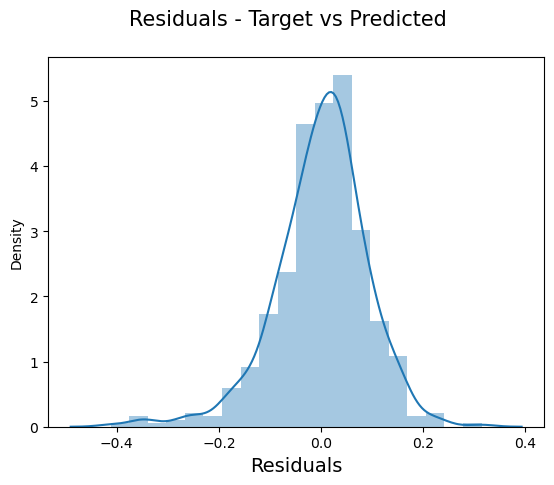

In [320]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predicted), bins = 20)
fig.suptitle('Residuals - Target vs Predicted', fontsize = 15)                  # Plot heading 
plt.xlabel('Residuals', fontsize = 14)                         # X-label

- Above plot shows that the residuals have an almost normal distribution centered around 0

Text(0, 0.5, 'residuals')

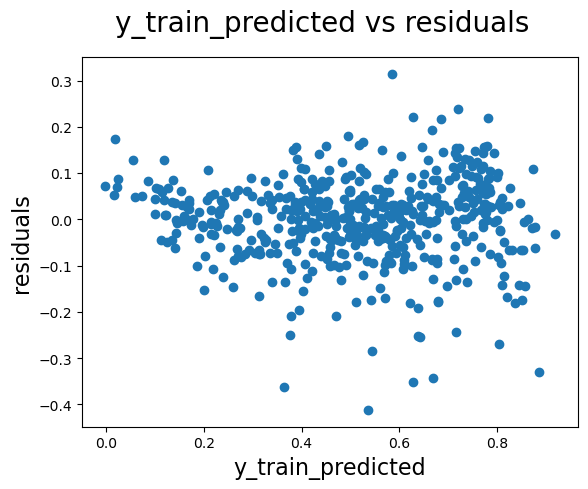

In [331]:
# Lets make a scatter plot of the residuals against the predicted set y_train_predicted
residuals = y_train - y_train_predicted
fig = plt.figure()
plt.scatter(y_train_predicted, residuals)
fig.suptitle('y_train_predicted vs residuals', fontsize=20)   # Plot heading 
plt.xlabel('y_train_predicted', fontsize=16)                  # X-label
plt.ylabel('residuals', fontsize=16)                          # Y-label

- As observed from the above plot the distribution of the residuals around zero is fairly independent of the values of the predicted target variable

### Q-Q plot of the residuals

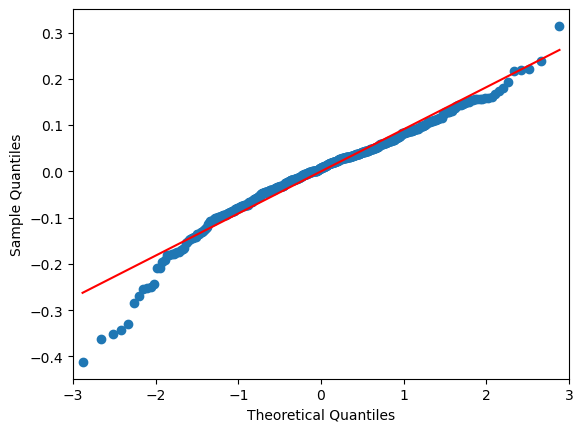

In [336]:
sm.qqplot(lm.resid, line='s')
plt.show()

- As observed from the plot the points almost follow a straight line (with a few exceptions), which means that the residuals have a normal distribution

## Step 5: Making predictions using the model

#### Apply rescaling on the test dataset

In [322]:
num_cols

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [323]:
df_test[num_cols] = scaler.transform(df_test[num_cols])

#### Split into X_test and y_test

In [324]:
y_test = df_test.pop('cnt')
X_test = df_test

In [325]:
#Use the model to make predictions

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [330]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

## Step 6: Model Evaluation

Text(0, 0.5, 'y_test_pred')

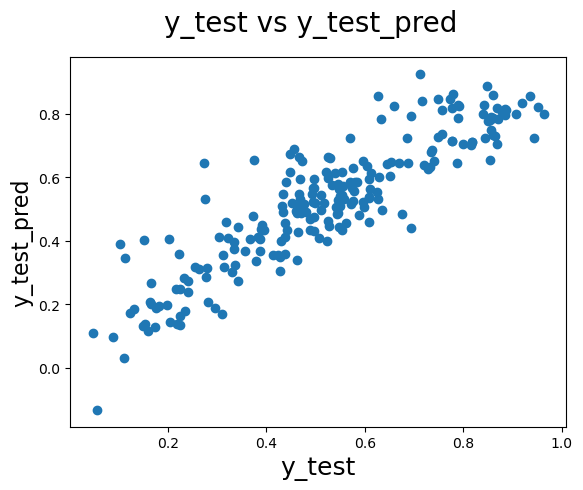

In [327]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

- Above plot indicates a clear linear relation between the y_test and y_test_pred with a few outliers

### Get the r2_score for y_test and y_test_pred

In [328]:
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_test

0.7961390438459764

In [329]:
r2_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
r2_train

0.8352749595695672

As seen above, the r2 score for train set and test set are close to each other with around 5% variance - this indicates that the model has generalized well